# Lab 3: Breast Cancer Coimbra Data Set

## Problem 1 (a): Load dataset
According to instruction, load `dataR2.csv` from Lab 3 repo.

In [3]:
# Visualization: Load dataset
import pandas as pd
df = pd.read_csv('dataR2.csv')
print(">>> example features: \n")
print(df.head())
print(">>> example classification: ")
print(df.iloc[:, -1].head())
print(">>> classification has unique (labels, counts): ")
print(df.iloc[:, -1].value_counts())
print(">>> features has shape: ")
print(df.shape)

>>> example features: 

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               0  
1  468.786               0  
2  554.697               0  
3  928.220               0  
4  773.920               0  
>>> example classification: 
0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64
>>> classification has unique (labels, counts): 
Classification
1    64
0    52
Name: count, dtype: int64
>>> features has shape: 
(116, 10)


## Problem 1 (b): Exploratory data analysis
- Plot scatter matrix with class=0 being red and class=1 being green.
- Select the first 40 rows of Class 0 and the first 48 rows of Class 1 as the training set (`training_data`, `training_class`) and the rest of the data as the test set (`test_data`, `test_class`).

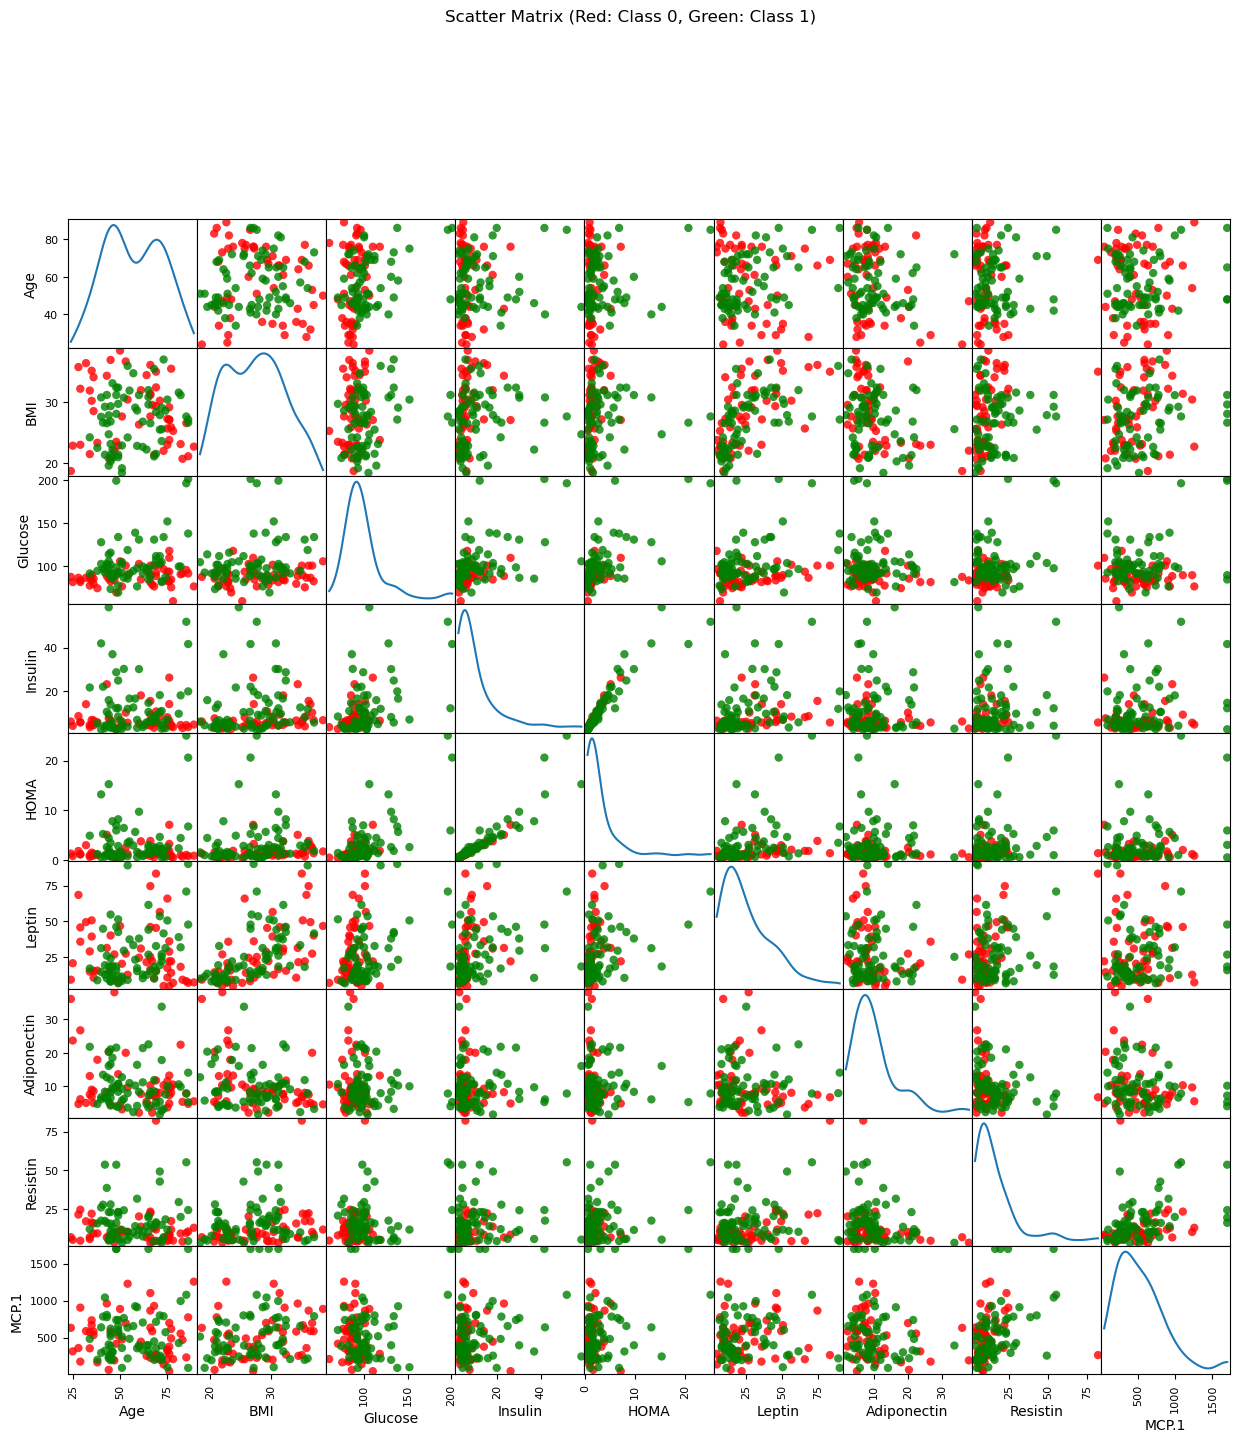

In [5]:
# ===== Make a colored scatter matrix ===== #
# Hint: use variable features_pd and pd.plotting.scatter_matrix()
import matplotlib.pyplot as plt

# Select features to plot: all except 'Classification'
features_pd = df.iloc[:, :-1]
class_label = df['Classification']

# Generate scatter matrix with color by class
colors = class_label.map({0: "red", 1: "green"})
pd.plotting.scatter_matrix(features_pd, figsize=(15, 15), c=colors, diagonal='kde', alpha=0.8, marker='o')
plt.suptitle("Scatter Matrix (Red: Class 0, Green: Class 1)", y=1.02)
plt.show()

# ===== End of Make a colored scatter matrix ===== #

# ===== Divide into training and test set ===== #
class0_df = df[df['Classification'] == 0]
class1_df = df[df['Classification'] == 1]

train_class0 = class0_df.iloc[:40]
train_class1 = class1_df.iloc[:48]
training_data = pd.concat([train_class0, train_class1], axis=0)
training_class = training_data['Classification']

# The rest as test set
test_class0 = class0_df.iloc[40:]
test_class1 = class1_df.iloc[48:]
test_data = pd.concat([test_class0, test_class1], axis=0)
test_class = test_data['Classification']

# Remove the class column from the feature sets
training_data = training_data.drop('Classification', axis=1)
test_data = test_data.drop('Classification', axis=1)

training_data = training_data.reset_index(drop=True)
training_class = training_class.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
test_class = test_class.reset_index(drop=True)

# ===== End of Divide into training and test set ===== #

In [6]:
# TEST: 1(b)

print(f">>> Passed P1(b) Tests.")

>>> Passed P1(b) Tests.


## Problem 1 (c): Classification using KNN on Breast Cancer Coimbra Data Set
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `euclidean`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k.

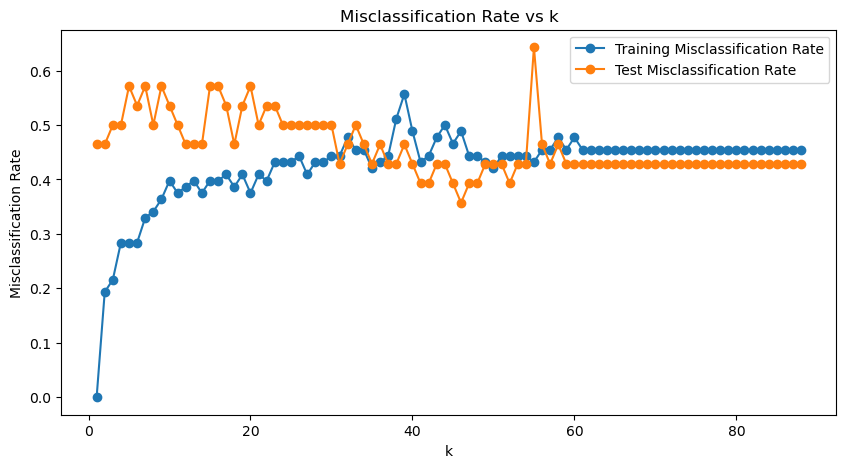

In [7]:
# ===== Classify training/test data ===== #
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_misclass_rates = []
test_misclass_rates = []
for k in range(88,0,-1):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(training_data, training_class)
    train_pred = knn.predict(training_data)
    test_pred = knn.predict(test_data)
    train_misclass = np.mean(train_pred != training_class)
    test_misclass = np.mean(test_pred != test_class)
    train_misclass_rates.append(train_misclass)
    test_misclass_rates.append(test_misclass)

# ===== End of Classify training/test data ===== #

# ===== Plot misclassification rate ===== #
plt.figure(figsize=(10, 5))
plt.plot(range(88, 0, -1), train_misclass_rates, label='Training Misclassification Rate', marker='o')
plt.plot(range(88, 0, -1), test_misclass_rates, label='Test Misclassification Rate', marker='o')
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs k')
plt.legend()
# ===== End of Plot misclassification rate ===== #

In [8]:
# ===== Which k^* is the most suitable k ===== #
min_misclass_rate = 1
best_k = 0
for k in range(88,0,-1):
    if test_misclass_rates[k-1] < min_misclass_rate:
        min_misclass_rate = test_misclass_rates[k-1]
        best_k = k
print(f">>> The most suitable k is {best_k}.")
# ===== End of Which k^* is the most suitable k ===== #

>>> The most suitable k is 43.


## Problem 1 (d): Replace the Euclidean metric with the Minkowski distance
- Train kNN module with training data. Set `weights` to `uniform`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [9]:
# ===== Classify training/test data ===== #
train_misclass_rates = []
test_misclass_rates = []
for k in range(88,0,-1):
    train_misclass_rates_k = []
    test_misclass_rates_k = []
    for p in range(1,6):
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='minkowski', p=p)
        knn.fit(training_data, training_class)
        train_pred = knn.predict(training_data)
        test_pred = knn.predict(test_data)
        train_misclass = np.mean(train_pred != training_class)
        test_misclass = np.mean(test_pred != test_class)
        train_misclass_rates_k.append(train_misclass)
        test_misclass_rates_k.append(test_misclass)
    train_misclass_rates.append(train_misclass_rates_k)
    test_misclass_rates.append(test_misclass_rates_k)
# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #
best_k = None
best_p = None
min_misclass_rate = float('inf')
for i, k in enumerate(range(88,0,-1)):
    for j, p in enumerate(range(1,6)):
        if test_misclass_rates[i][j] < min_misclass_rate:
            min_misclass_rate = test_misclass_rates[i][j]
            best_k = k
            best_p = p
print(f">>> optimal k is {best_k}, optimal p is {best_p}")

# ===== End of Find the optimal (k, p) ===== #

>>> optimal k is 52, optimal p is 1


# Extra Credit
- Train kNN module with training data. Set `weights` to `distance`, `metric` to `minkowski`.
- Compute misclassification rates on both training and test dataset.
- Find and report the best k and p.

In [7]:
# ===== Classify training/test data ===== #

# ===== End of Classify training/test data ===== #

# ===== Find the optimal (k^*, p^*) ===== #

print(">>> optimal k is , optimal p is ")
# ===== End of Find the optimal (k, p) ===== #

>>> optimal k is , optimal p is 
